In [15]:
from keras.utils import to_categorical
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np

In [16]:
np.random.seed(3)

# 1. 데이터셋 준비하기

# 훈련셋과 시험셋 로딩
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

X_train = X_train.reshape(60000, 784).astype('float32') / 255.0
X_test = X_test.reshape(10000, 784).astype('float32') / 255.0

In [17]:
# 라벨링 전환
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

In [18]:
# 2. 모델 구성하기
model = Sequential()
model.add(Dense(units=32, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

In [19]:
# 3. 모델 엮기
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [20]:
# 4. 모델 학습시키기
hist = model.fit(X_train, Y_train, epochs=100, batch_size=32)

Epoch 1/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 293us/step - accuracy: 0.6433 - loss: 1.1051
Epoch 2/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 281us/step - accuracy: 0.8160 - loss: 0.5452
Epoch 3/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 279us/step - accuracy: 0.8338 - loss: 0.4859
Epoch 4/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 292us/step - accuracy: 0.8366 - loss: 0.4650
Epoch 5/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 281us/step - accuracy: 0.8514 - loss: 0.4328
Epoch 6/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 283us/step - accuracy: 0.8545 - loss: 0.4189
Epoch 7/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 281us/step - accuracy: 0.8564 - loss: 0.4155
Epoch 8/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 280us/step - accuracy: 0.8610 - loss: 0.4020
Epoch 9/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 287us/step - accuracy: 0.8634 - loss: 0.3958
Epoch 10/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 302us/step - accuracy: 0.8649 - loss: 0.3872
Epoch 11/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 273us/step - accuracy: 0.8675 - loss: 0.38

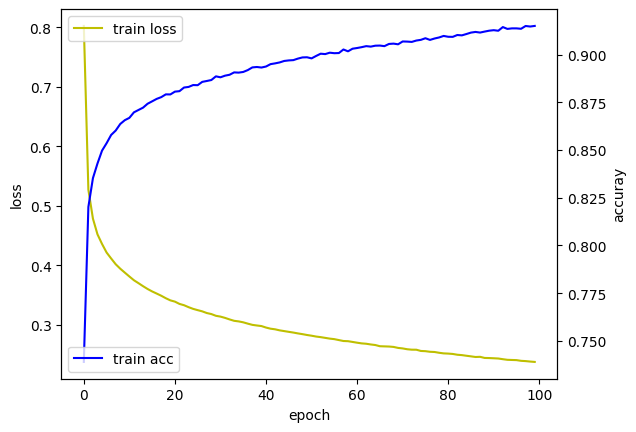

In [21]:
# 5. 모델 학습 과정 표시하기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [22]:
# 6. 모델 평가하기
result = model.evaluate(X_test, Y_test)
print(result)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 272us/step - accuracy: 0.8616 - loss: 0.3948
[0.39055347442626953, 0.86080002784729]


# 검증 추가

In [45]:
np.random.seed(3)

# 1. 데이터셋 준비하기

# 훈련셋과 시험셋 로딩
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

X_train = X_train.reshape(60000, 784).astype('float32') / 255.0
X_test = X_test.reshape(10000, 784).astype('float32') / 255.0

#X_val = X_val.reshape(10000, 784).astype('float32') / 255.0

# 훈련셋과 검증셋 분리
X_val = X_train[50000:]
Y_val = Y_train[50000:]
X_train = X_train[:50000]
Y_train = Y_train[:50000]

In [46]:
# 라벨링 전환
Y_train = to_categorical(Y_train)
Y_val = to_categorical(Y_val)
Y_test = to_categorical(Y_test)

In [47]:
# 2. 모델 구성하기
model = Sequential()
model.add(Dense(units=32, input_dim=28*28, activation='relu'))
model.add(Dense(units=4, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

In [48]:
# 3. 모델 엮기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [49]:
# 4. 모델 학습시키기
hist = model.fit(X_train, Y_train, epochs=200, batch_size=32, validation_data=(X_val, Y_val))

Epoch 1/200
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 501us/step - accuracy: 0.5946 - loss: 1.1260 - val_accuracy: 0.7893 - val_loss: 0.6358
Epoch 2/200
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 402us/step - accuracy: 0.8101 - loss: 0.5638 - val_accuracy: 0.8240 - val_loss: 0.5221
Epoch 3/200
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 400us/step - accuracy: 0.8338 - loss: 0.4887 - val_accuracy: 0.8396 - val_loss: 0.4863
Epoch 4/200
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 404us/step - accuracy: 0.8455 - loss: 0.4548 - val_accuracy: 0.8392 - val_loss: 0.4705
Epoch 5/200
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 401us/step - accuracy: 0.8522 - loss: 0.4257 - val_accuracy: 0.8543 - val_loss: 0.4455
Epoch 6/200
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 389us/step - accuracy: 0.8670 - loss: 0.3901 - val_accuracy: 0.8486 - val_loss: 0.4467
Epoch 7/200
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 404us/step - accuracy: 0.8626 - loss: 0.3907 - val_accuracy: 0.8569 - val_loss: 0.4234
Epoch 8/200
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 428us/step - accuracy: 

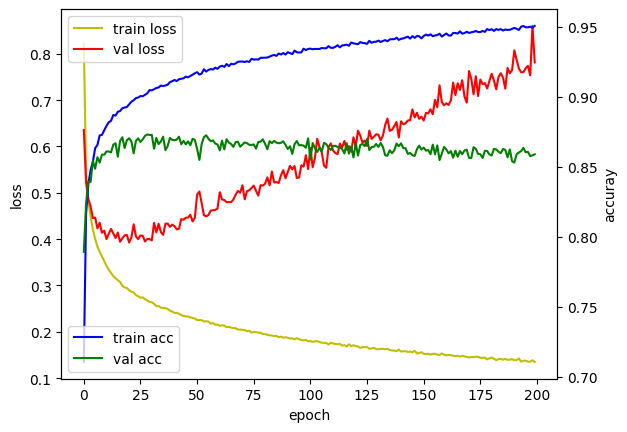

In [50]:
# 5. 모델 학습 과정 표시하기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [51]:
# 6. 모델 평가하기
result = model.evaluate(X_test, Y_test)
print(result)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 277us/step - accuracy: 0.8512 - loss: 0.7782
[0.8134685158729553, 0.8514000177383423]


## 과적합 되기 전의 epochs 로 다시 실행